In [1]:
import numpy as np
from functools import *
from itertools import *
from operator import *
from random import *
from multiprocessing import Pool
from defs import *
import csv

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
def processDataFile(filename):
    
    x = np.zeros(0)
    try:
        with open(filename, newline ='') as csvfile:
            reader = csv.reader(csvfile,delimiter=',')
            n = 0
            n_robot = 1
            data = []
            for row in reader:
                if n==0: print(row)
                if n !=0:
                    y = [float(f) for f in row]
                    data.append(y)
                n+=1
            x = np.array(data)
            print(x.shape)
    except:
        print("File not Found")

    return x

In [3]:
def PlotProfitability(data,x=None,seq=None,maxbot=None,pb=False,PricePerPick=0.1):
    TimeMultiple = 360/30
    
    
    totalbot = int(fulldata[-1,1])
    
    n_of_p = np.unique(data[:,2]).size
    
    
    #PricePerPick=0.1
    HumanLabor = 40000*3
    RobotCostPerYear=80000/3.0
    
    if None == x: x=ps
    if type(None) == type(maxbot): maxbot = totalbot

    
    for n_robot in range(0,maxbot):
        start = n_robot*n_of_p
        stop = start+n_of_p

        num_bot = int(data[start,1])
        PicksPerYear = data[start:stop,9]*TimeMultiple
        
        profitability = PicksPerYear*PricePerPick-(num_bot*RobotCostPerYear+HumanLabor)
        if pb: profitability = profitability/num_bot
    
        plt.plot(x,profitability,label = f'{num_bot}')
        if num_bot%2==0: plt.text(max(x),profitability[-1],f'{num_bot}')
    
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((0, min(profitability)), max(x), 0-min(profitability),
                                    alpha=1, color='0.75'))
    
    plt.title('Profitability')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Annual Profit')
    if pb: 
        plt.title('Profitability per Robot')
        plt.ylabel('Annual Profit')


    
    
    if type(seq)==type([]):
        selected = []
        for i in range(0,n_of_p):
            n_robot = nbot[i]
            num_bot=n_robot
            point = (n_robot-1)*n_of_p+i
            profitability = data[point]*TimeMultiple*PricePerPick-(num_bot*RobotCostPerYear+HumanLabor)
            if pb: profitability = profitability/num_bot
            selected.append( profitability )
            #print(data[point])
        nd = np.array(selected)
        plt.plot(x,nd[:,9],'kx-',label = 'Seq',linewidth=2.0)
        stringput = ['$'+str(round(a,2)) for a in nd[:,9]]
        print(stringput)
    
    
    
    plt.show() 

In [111]:
filename = 'CDF1-45.csv'
fulldata = processDataFile(filename)
x = [0.0, 0.5, 1.0,1.25, 1.5,1.75, 2.0, 2.25, 2.5, 3.0]

['n_humans', 'n_robots', 'p_robot', 'mean Human Down', ' stdev human down', 'mean robot Down', ' stdev robot down', 'Success rate', 'stdev successrate', 'n_total', 'stdev n_total']
(450, 11)


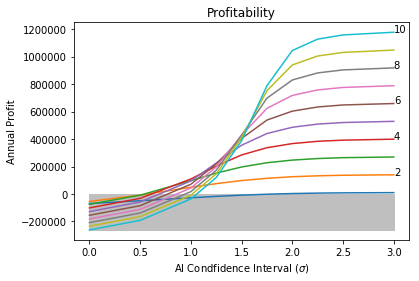

In [24]:
PlotProfitability(fulldata,x,maxbot=10, pb=False)

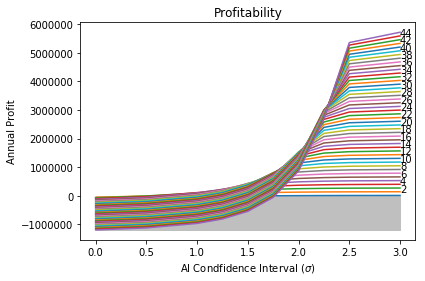

In [20]:
nbot = [2  ,3   , 3  , 4   , 5  , 5  , 10 , 18  , 29 , 29 ]
PlotProfitability(fulldata,x,pb=False)

['$-54402.65', '$-7933.13', '$109322.65', '$219066.08', '$428553.75', '$801130.96', '$1527891.48', '$2958038.23', '$5354079.36', '$5715065.28']


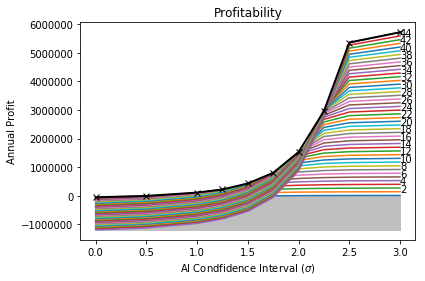

In [25]:
nbot = [2  ,3   , 4  , 6   , 8  , 12  , 18 , 29  , 45 , 45 ]
PlotProfitability(fulldata,x,nbot,pb=False)

['$-27201.33', '$-2999.87', '$27330.66', '$36511.01', '$53569.22', '$66760.91', '$84882.86', '$102001.32', '$118979.54', '$127001.45']


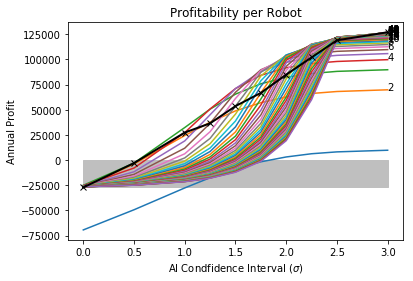

In [22]:
PlotProfitability(fulldata,x,nbot,pb=True)

['$-27201.33', '$-2999.87', '$32314.65', '$50787.3', '$70993.61', '$88032.12', '$104441.34', '$114992.32', '$122224.53', '$127001.45']


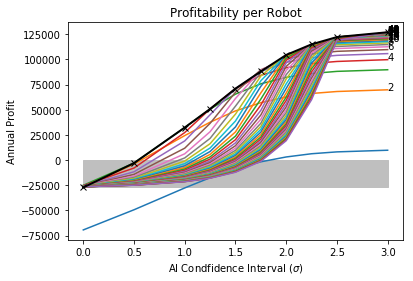

In [23]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3   , 3  , 4   , 5  , 5  , 10 , 18  , 28, 45 ]
PlotProfitability(fulldata,x,nbot,pb=True)

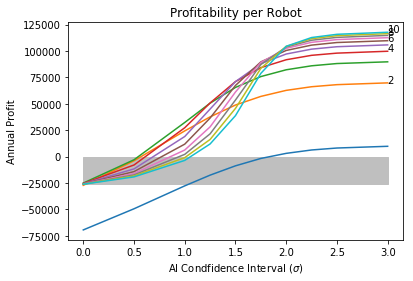

In [112]:
PlotProfitability(fulldata,x,maxbot=10, pb=True)

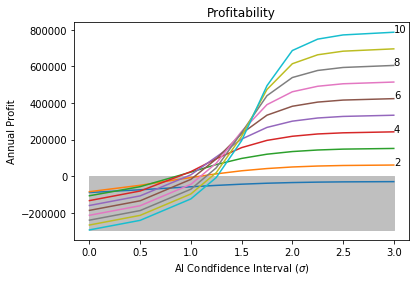

In [16]:
PlotProfitability(fulldata,x,maxbot=10, PricePerPick=0.075)

['$-54402.65', '$-8999.6', '$109322.65', '$219066.08', '$428553.75', '$788035.53', '$1044413.37', '$1127395.65', '$1157956.29', '$1177499.37']


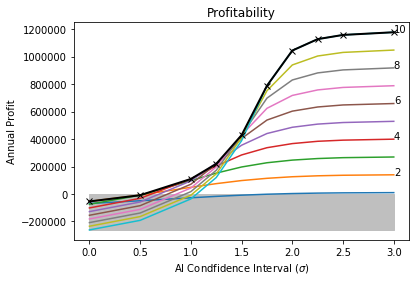

In [113]:
nbot = [2  ,3   , 4  , 6   , 8  , 10  , 10 , 10  , 10 , 10 ]
PlotProfitability(fulldata,x,nbot,maxbot=10, PricePerPick=0.10)

['$-108045.57', '$-90633.23', '$-51528.02', '$-11758.73', '$62087.6', '$200684.43', '$328873.35', '$370364.49', '$385644.81', '$395416.35']


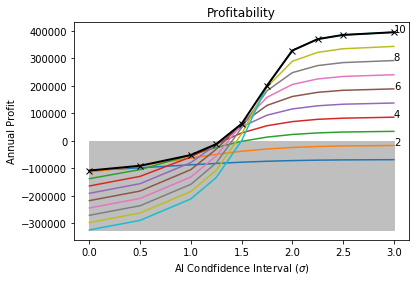

In [131]:
nbot = [1  ,2   , 3  , 4   , 6  , 10  , 10 , 10  , 10 , 10 ]
PlotProfitability(fulldata,x,nbot,maxbot=10, PricePerPick=0.05)

['$-127356.12', '$-122350.08', '$-116927.22', '$-111192.29', '$-100877.42', '$-75464.53', '$-28896.66', '$-8151.09', '$-510.93', '$4374.84']


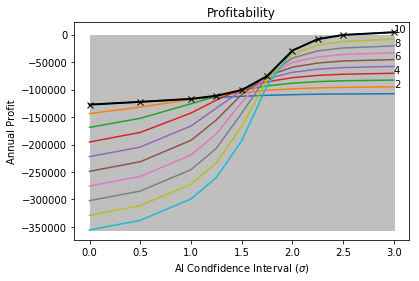

In [138]:
nbot = [1  ,1   , 1  , 2   , 3  , 6  , 10 , 10  , 10 , 10 ]
PlotProfitability(fulldata,x,nbot,maxbot=10, PricePerPick=0.025)

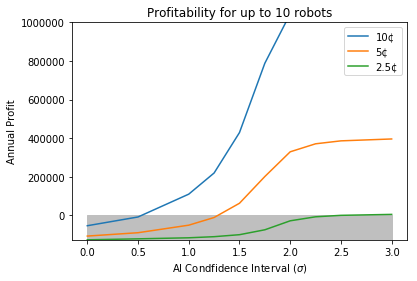

In [141]:
p2p5 = ['$-127356.12', '$-122350.08', '$-116927.22', '$-111192.29', '$-100877.42', '$-75464.53', '$-28896.66', '$-8151.09', '$-510.93', '$4374.84']
p5 = ['$-108045.57', '$-90633.23', '$-51528.02', '$-11758.73', '$62087.6', '$200684.43', '$328873.35', '$370364.49', '$385644.81', '$395416.35']
p10 = ['$-54402.65', '$-8999.6', '$109322.65', '$219066.08', '$428553.75', '$788035.53', '$1044413.37', '$1127395.65', '$1157956.29', '$1177499.37']

p5 = [float(y.replace('$','')) for y in p5]
p10 = [float(y.replace('$','')) for y in p10]
p2p5 = [float(y.replace('$','')) for y in p2p5]


f2 = plt.figure(2)

plt.plot(x,p10,label = '10¢')
plt.plot(x,p5,label = '5¢')
plt.plot(x,p2p5,label = '2.5¢')

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, min(plt.ylim())), max(x), 0-min(plt.ylim()),
                                    alpha=1, color='0.75'))
plt.ylim((min(p2p5),1000000))
plt.title('Profitability for up to 10 robots')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Annual Profit')
plt.legend()
plt.show()

f2.savefig('CurrenttoMIll.png', bbox_inches='tight')


This is an analysis of systems with    
    mu=5
    sigma=2
    mintime=1
    e_human=60

['n_humans', 'n_robots', 'p_robot', 'mean Human Down', ' stdev human down', 'mean robot Down', ' stdev robot down', 'Success rate', 'stdev successrate', 'n_total', 'stdev n_total']
(110, 11)


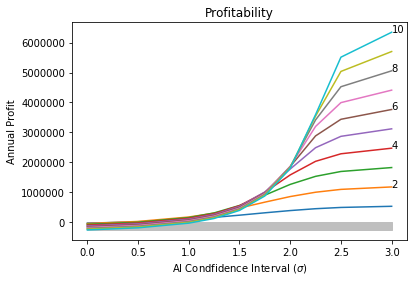

In [86]:
filename = 'Speedup1.csv'
fulldata = processDataFile(filename)
x = [0.0, 0.5, 1.0,1.25, 1.5,1.75, 2.0, 2.25, 2.5, 3.0]
PlotProfitability(fulldata,x, PricePerPick=0.1,maxbot=10)

['$-37168.35', '$21326.83', '$169932.55', '$306313.96', '$554898.52', '$1005152.39', '$1862306.69', '$3591028.17', '$5512328.37', '$6345797.49']


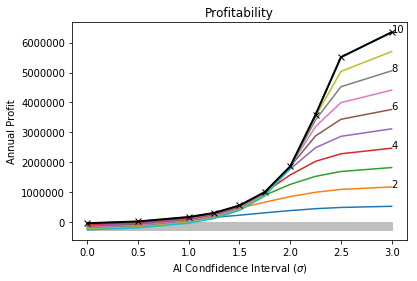

In [92]:
nbot = [1  ,2   , 2  , 3   , 3  ,5, 7 , 10  , 10 , 10 ]
PlotProfitability(fulldata,x,nbot, PricePerPick=0.1,maxbot=10)

['$-91917.51', '$-67322.49', '$-1700.39', '$62738.41', '$177449.26', '$384965.89', '$787959.44', '$1602180.75', '$2562830.85', '$2979565.41']


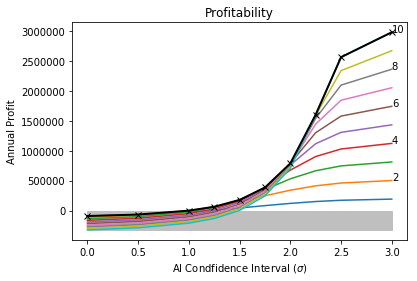

In [95]:
nbot = [1  ,1   , 2  , 2   , 3  , 4  , 6 , 10  , 10 , 10 ]
PlotProfitability(fulldata,x,nbot, PricePerPick=0.05,maxbot=10)

['$-119292.09', '$-106994.58', '$-85992.51', '$-55297.46', '$-11275.37', '$79149.61', '$253979.72', '$607757.04', '$1088082.09', '$1296449.37']


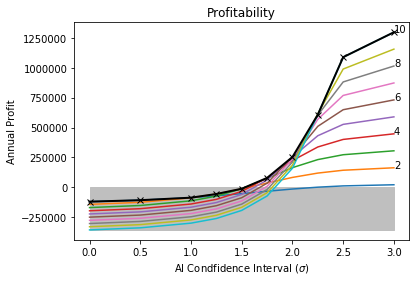

In [97]:
nbot = [1  ,1   , 1  , 2   , 3  , 4  , 6 , 10  , 10 , 10 ]
PlotProfitability(fulldata,x,nbot, PricePerPick=0.025,maxbot=10)

In [110]:
p5 = ['$-91917.51', '$-67322.49', '$-1700.39', '$62738.41', '$177449.26', '$384965.89', '$787959.44', '$1602180.75', '$2562830.85', '$2979565.41']
p10 = ['$-37168.35', '$21326.83', '$169932.55', '$306313.96', '$554898.52', '$1005152.39', '$1862306.69', '$3591028.17', '$5512328.37', '$6345797.49']
p2p5 = ['$-119292.09', '$-106994.58', '$-85992.51', '$-55297.46', '$-11275.37', '$79149.61', '$253979.72', '$607757.04', '$1088082.09', '$1296449.37']
x = [0.0, 0.5, 1.0,1.25, 1.5,1.75, 2.0, 2.25, 2.5, 3.0]

p5 = [float(y.replace('$','')) for y in p5]
p10 = [float(y.replace('$','')) for y in p10]
p2p5 = [float(y.replace('$','')) for y in p2p5]




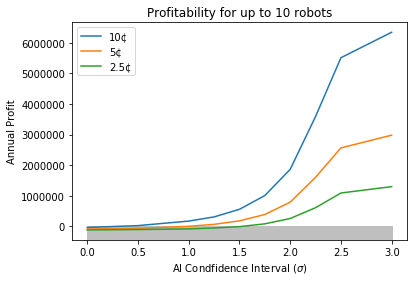

In [109]:
f1 = plt.figure(1)
plt.plot(x,p10,label = '10¢')
plt.plot(x,p5,label = '5¢')
plt.plot(x,p2p5,label = '2.5¢')

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, min(plt.ylim())), max(x), 0-min(plt.ylim()),
                                    alpha=1, color='0.75'))

plt.title('Profitability for up to 10 robots')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Annual Profit')
plt.legend()
plt.show()

f1.savefig('Full.png', bbox_inches='tight')

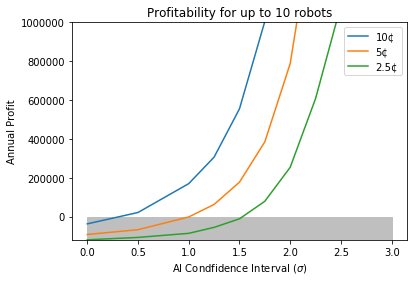

In [108]:
f2 = plt.figure(2)

plt.plot(x,p10,label = '10¢')
plt.plot(x,p5,label = '5¢')
plt.plot(x,p2p5,label = '2.5¢')

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, min(plt.ylim())), max(x), 0-min(plt.ylim()),
                                    alpha=1, color='0.75'))
plt.ylim((min(p2p5),1000000))
plt.title('Profitability for up to 10 robots')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Annual Profit')
plt.legend()
plt.show()

f2.savefig('toMIll.png', bbox_inches='tight')